## Incremental Saving Validation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob as glob
import h5py
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters
from matplotlib import cm
from matplotlib import colors
from seaborn import cm as cmap

In [2]:
specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'none', lib='bc03', sample='mini_mocha') 
input_mass = meta['logM_total'][:]

In [165]:
class convergence_plotter_single2():
    def __init__(self,walkers,num_run,data_dir,ID):
        self.num_walkers = walkers
        self.num_run = num_run
        self.data_dir = data_dir
        self.files = []
        self.ID = ID
        
    def opener(self, pr = False):
        f = [x for x in glob.glob(f'{self.data_dir}/*.{self.ID}.mcmc.hdf5')]  
        f.sort()
        if pr:
            print(f)
        files = []
        
        for i in f:
            file = h5py.File(i,'r')
            files.append(file)
        
        self.files = files
        return bool(len(f))
    
    def get_output(self):
        keys = list(self.files[0].keys())
        idx = 0
        data = []
        for k in keys:
            if 'mcmc_chain' in k:
                data.append(self.files[0][k][...][:,:,0])
                
        data = np.ravel(data)
        print(data.shape)
        med = np.median(data)
        return med 
    def get_err(self):
        keys = list(self.files[0].keys())
        idx = -1
        data = []
        for k in keys:
            if 'mcmc_chain' in k:
                data.append(self.files[0][k][...][:,:,0])
        data = np.ravel(data)
        med = np.median(data)
        up = np.percentile(data,84.1) - med
        lo = med - np.percentile(data, 15.9)
        return up, lo
    
    def get_length(self):
        data = self.files[0]['mcmc_chain'][...][:,0]
        return len(data)

In [166]:
# path = os.environ.get('GQPMC_DIR') + 'mini_mocha/ispeculator/ACM/run_03/photo_0_96'
path = os.environ.get('GQPMC_DIR') + 'mini_mocha/ispeculator/incremental_test_run/photo_0_31'

In [167]:
path = os.environ.get('GQPMC_DIR') + 'mini_mocha/ispeculator/incremental_test_run/photo_0_31'
valid_set = []
for i in range(97):
    file = convergence_plotter_single2(40,1000000,path,i)
    try:
        if file.opener(pr = False):
            valid_set.append(file)
        else:
            valid_set.append('N/A')
    except:
        valid_set.append('N/A')
meds = []
ups = []
los = []
for i,s in enumerate(valid_set):
    print(i, end = '\r')
    if s != 'N/A':
        meds.append(s.get_output())
        up, lo = s.get_err()
        ups.append(up)
        los.append(lo)
    else:
        meds.append(-1)
        up,lo = (0,0)
        ups.append(up)
        los.append(lo)

(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)


In [179]:
path = os.environ.get('GQPMC_DIR') + 'mini_mocha/ispeculator/ACM/run_03/photo_0_96'
valid_set2 = []
for i in range(97):
    file = convergence_plotter_single2(40,1000000,path,i)
    try:
        if file.opener(pr = False):
            valid_set2.append(file)
        else:
            valid_set2.append('N/A')
    except:
        valid_set2.append('N/A')
meds2 = []
ups2 = []
los2 = []
for i,s in enumerate(valid_set):
    print(i, end = '\r')
    if s != 'N/A':
        meds2.append(s.get_output())
        up, lo = s.get_err()
        ups2.append(up)
        los2.append(lo)
    else:
        meds2.append(-1)
        up,lo = (0,0)
        ups2.append(up)
        los2.append(lo)

(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)
(400000,)


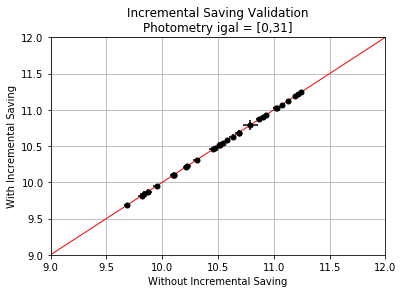

In [186]:
plt.errorbar(meds2,meds, yerr =(ups,los), xerr = (ups2, los2),fmt = 'ok', ms= 5, label = 'Incremental Saving')
plt.xlabel('Without Incremental Saving')
plt.ylabel('With Incremental Saving')
plt.xlim(9,12)
plt.grid()
plt.ylim(9,12)
plt.plot([9,12],[9,12], c = 'r', lw = 1)
plt.title('Incremental Saving Validation\nPhotometry igal = [0,31]')
plt.savefig('incremental_validation.pdf', format = 'pdf')